In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import glob
import os
import pickle
from matplotlib.pyplot import cm
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
cmaps = OrderedDict()
import matplotlib
import matplotlib.pyplot as plt

In [9]:
trial_pair=[]
while len(trial_pair)<20:
    i=np.random.randint(0,20)
    if i not in trial_pair:
        trial_pair.append(i)
trial_pair=np.array(trial_pair).reshape(10,2)
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
BRG1_nat=md.load('~/native/BRG1.pdb')
CHD4_nat=md.load('~/native/CHD4.pdb')
NSD3_nat=md.load('~/native/NSD3.pdb')
TP_nat=md.load('~/native/TP.pdb')
LANA_nat=md.load('~/native/LANA.pdb')
JMJD6_nat=md.load('~/native/JMJD6.pdb')
host_len=len(CHD4_nat.top.to_fasta()[0])
BRG1_dis = np.linalg.norm(np.average(BRG1_nat.xyz[0][BRG1_nat.top.select(f'name CA and resid {39+len(BRG1_nat.top.to_fasta()[0])} to {43+len(BRG1_nat.top.to_fasta()[0])}')],axis=0)-np.average(BRG1_nat.xyz[0][BRG1_nat.top.select('resid 3 to 8 and name CA')],axis=0))
CHD4_dis = np.linalg.norm(np.average(CHD4_nat.xyz[0][CHD4_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(CHD4_nat.xyz[0][CHD4_nat.top.select(f'resid {host_len+6} to  {host_len+7} and name CA')],axis=0))
NSD3_dis = np.linalg.norm(np.average(NSD3_nat.xyz[0][NSD3_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(NSD3_nat.xyz[0][NSD3_nat.top.select(f'resid {host_len+2} to  {host_len+7} and name CA')],axis=0))
TP_dis = np.linalg.norm(np.average(TP_nat.xyz[0][TP_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(TP_nat.xyz[0][TP_nat.top.select(f'resid {host_len+13} to  {host_len+19} and name CA')],axis=0))
LANA_dis = np.linalg.norm(np.average(LANA_nat.xyz[0][LANA_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(LANA_nat.xyz[0][LANA_nat.top.select(f'resid {host_len+5} to  {host_len+9} and name CA')],axis=0))
JMJD6_dis = np.linalg.norm(np.average(JMJD6_nat.xyz[0][JMJD6_nat.top.select('chainid 0 and name CA and resid 39 to 43')],axis=0)-np.average(JMJD6_nat.xyz[0][JMJD6_nat.top.select(f'resid {host_len} to  {host_len+11} and name CA')],axis=0))
binder_seq = [seq.top.to_fasta()[1] for seq in [LANA_nat,JMJD6_nat,CHD4_nat,NSD3_nat,BRG1_nat,TP_nat]]
binder_dis = [LANA_dis,JMJD6_dis,CHD4_dis,NSD3_dis,BRG1_dis,TP_dis]
binder_region = [[5,9],[0,11], [6,7],[2,7], [3,8],[13,19]]
binder=['JMJD6','LANA','NSD3','CHD4','BRG1','TP']


In [10]:
results={}
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bb]+'_'+binder[bbb]
        all_seq = glob.glob(target+'/result_mono'+'/seq_unrelaxed_rank_*_model_*pdb')
        b_dis=[]
        c_dis=[]
        for i in all_seq:
            a=md.load(i)
            chain0=a.top.to_fasta()[0]
            chain1=a.top.to_fasta()[1]
            chain2=a.top.to_fasta()[2]
            b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain0)][0]} to {binder_region[binder_seq.index(chain0)][1]} and name CA')],axis=0))
            c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and ({len(chain0)+39} <= resid) and (resid <= {len(chain0)+43})')],axis=0)-np.average(a.xyz[0][a.top.select(f'resid {binder_region[binder_seq.index(chain2)][0]+len(chain0)+len(chain1)} to {binder_region[binder_seq.index(chain2)][1]+len(chain0)+len(chain1)} and name CA')],axis=0))
            b_dis.append(round(abs(b-binder_dis[binder_seq.index(chain0)]),3))
            c_dis.append(round(abs(c-binder_dis[binder_seq.index(chain2)]),3))
            if binder_seq.index(chain0) > binder_seq.index(chain2):
                results[f'{binder[binder_seq.index(chain0)]}_{binder[binder_seq.index(chain2)]}']=[b_dis,c_dis]
            else:
                results[f'{binder[binder_seq.index(chain2)]}_{binder[binder_seq.index(chain0)]}']=[c_dis,b_dis]


In [30]:
# with open('BET_single_mono_result.pkl','wb') as handle:
#     pickle.dump(results,handle)
bet_result=pickle.load(open('BET_10h_uniref_mono_result.pkl', 'rb'))


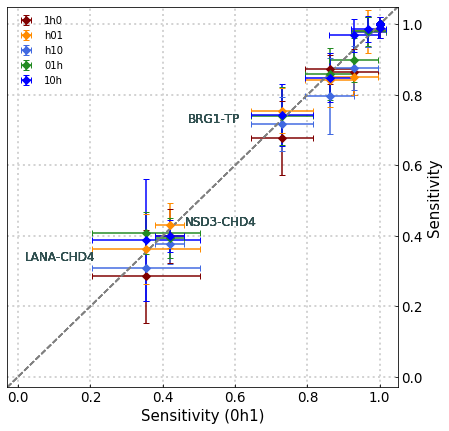

In [160]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
colors=['maroon','darkorange','royalblue','forestgreen','blue']
comparisons=['1h0','h01','h10','01h','10h']
ax.tick_params(axis='y',left=False,right=True,labelleft=False,labelright=True)
for i in range(5):
    ax.errorbar(mean[0],mean[i+1],xerr=std[0],yerr=std[i+1],fmt='D',capsize=3,color=colors[i],label=comparisons[i])
    ax.plot([-0.03,1.05],[-0.03,1.05],'--',color='gray')
    ax.set_xlim(-0.03,1.05)
    ax.set_ylim(-0.03,1.05)
    ax.set_xticks(np.linspace(0.0, 1, 6))#, minor=True)
    ax.set_yticks(np.linspace(0.0, 1, 6))#, minor=True)
    ax.set_xticklabels([round(i*0.2,2) for i in range(6)],fontsize=13.5)
    ax.set_yticklabels([round(i*0.2,2) for i in range(6)],fontsize=13.5)
    ax.grid(which='major', color='lightgray', linestyle='dotted', linewidth=2)
    ax.legend(frameon=False)
    ax.tick_params(axis="both",direction="in")
    ax.set_xlabel('Sensitivity (0h1)',fontsize=15)
    ax.set_ylabel('Sensitivity',fontsize=15)
    ax.text(0.02, 0.33,'LANA-CHD4',fontsize=12,color='darkslategrey')
    ax.text(0.46, 0.43,'NSD3-CHD4',fontsize=12,color='darkslategrey')
    ax.text(0.47, 0.72,'BRG1-TP',fontsize=12,color='darkslategrey')
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

# plt.savefig('./BET_uniref_mono_seq_switch_result.pdf',bbox_inches = "tight")

LANA_JMJD6 [6, 7, 7, 8, 7, 7, 6, 7, 6, 8] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
NSD3_JMJD6 [6, 7, 6, 6, 6, 6, 6, 6, 7, 6] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
CHD4_JMJD6 [9, 10, 10, 9, 9, 9, 10, 8, 10, 9] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
BRG1_JMJD6 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
TP_JMJD6 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
NSD3_LANA [10, 10, 10, 9, 7, 9, 9, 9, 9, 10] [0, 0, 0, 1, 2, 1, 1, 1, 1, 0] 0.93 0.07
CHD4_LANA [3, 7, 4, 3, 5, 3, 3, 3, 1, 3] [7, 3, 6, 7, 5, 6, 7, 7, 9, 7] 0.35 0.15
BRG1_LANA [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
TP_LANA [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1.0 0.0
CHD4_NSD3 [5, 4, 4, 5, 4, 4, 4, 4, 4, 4] [5, 6, 6, 5, 6, 6, 6, 6, 6, 6] 0.42 0.04
BRG1_NSD3 [8, 8, 7, 9, 9, 7, 8, 8, 8, 8] [1, 1, 2, 1, 1, 2, 2, 1, 0, 2] 0.86 0.07
TP_NSD3 [10, 10, 8, 10, 9, 10, 10, 10, 9, 10] [0, 0, 1, 0, 1, 0

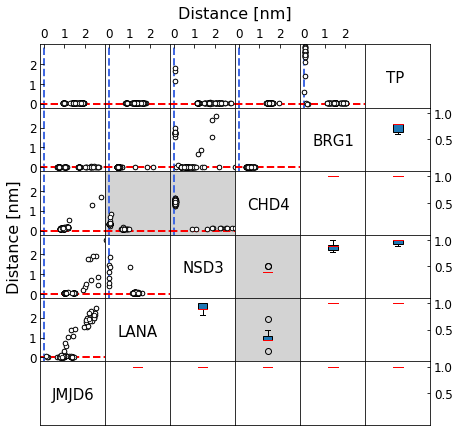

In [162]:
fig,ax=plt.subplots(6,6,figsize=(7,7))
mean, std = [],[]
# for d in ['','_r','_h01','_h10','_01h','_10h']:
bet_result=pickle.load(open(f'BET_uniref_mono_result.pkl', 'rb'))
tmp_mean,tmp_std=[],[]
for i in trials:
    bet_result['CHD4_NSD3_'+i]=bet_result['NSD3_CHD4_'+i]
    bet_result['CHD4_NSD3_'+i]=bet_result['CHD4_NSD3_'+i][::-1]
    bet_result['LANA_JMJD6_'+i]=bet_result['JMJD6_LANA_'+i]
    bet_result['LANA_JMJD6_'+i]=bet_result['LANA_JMJD6_'+i][::-1]
for bb in range(5):
    ax[0][bb].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb][0].tick_params(axis="both",direction="in",labelsize=12)
    ax[bb+1][5].tick_params(axis="y",direction="in",labelsize=12)
for bb in range(6):
    for bbb in range(bb+1,6):
        target = binder[bbb]+'_'+binder[bb]
        tmp_T=[]
        tmp_F=[]
        binder_0=[]
        binder_1=[]
        for i in trial_pair:
            binder_0.append(bet_result[f'{target}_'+trials[i[0]]][0])
            binder_0.append(bet_result[f'{target}_'+trials[i[1]]][0])
            binder_1.append(bet_result[f'{target}_'+trials[i[0]]][1])
            binder_1.append(bet_result[f'{target}_'+trials[i[1]]][1])
            tmp_T.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))>0.3]<0.2).sum())
            tmp_F.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))>0.3]<0.2).sum())
        tmp_TF=np.round(np.array(tmp_T/(np.array(tmp_T)+np.array(tmp_F))),3)
        binder_0=np.concatenate(binder_0)
        binder_1=np.concatenate(binder_1)
        print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
        ax[5-bb][bbb].yaxis.tick_right()
        box=ax[5-bb][bbb].boxplot(tmp_TF,patch_artist=True)
        tmp_mean.append(np.mean(tmp_TF))
        tmp_std.append(np.std(tmp_TF))
        ax[5-bb][bbb].set_ylim(-0.1,1.1)
        ax[5-bb][bbb].set_yticks([0.5,1])
        ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        ax[5-bb][bbb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        ax[5-bbb][bb].scatter(binder_1,binder_0,c='white',edgecolor='black',s=20,zorder=1)
        ax[5-bbb][bb].set_xlim(-0.2,3)
        ax[5-bbb][bb].set_ylim(-0.2,3)
        ax[5-bbb][bb].set_yticks([0,1,2])
        ax[5-bbb][bb].set_xticks([0,1,2])
        ax[5-bbb][bb].xaxis.tick_top()
        ax[5-bbb][bb].plot([0,0],[-0.2,3],'--',color='royalblue',linewidth=2,zorder=1)
        ax[5-bbb][bb].plot([-0.2,3],[0,0],'--',color='red',linewidth=2,zorder=1)
        ax[5-bbb][bb].scatter(binder_1,binder_0,c='white',edgecolor='black',linewidth=0.8,s=20,zorder=2)
        if bb!=0:
            ax[5-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
        if bbb!=5:
            ax[5-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        for patch in box['boxes']:
            patch.set(color='k')
            patch.set(facecolor = 'C0' )
        for median in box['medians']: 
            median.set(color ='red', linewidth = 1) 

for i in range(6):
    ax[5-i][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5-i][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[5][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[i][5].tick_params(axis='y',which='both',left=False,right=True,bottom=False,labelleft=False,labelright=True,labelbottom=False)

rect = ax[2][1].patch
rect.set_facecolor('lightgray')
rect = ax[2][2].patch
rect.set_facecolor('lightgray')
rect = ax[4][3].patch
rect.set_facecolor('lightgray')
rect = ax[3][3].patch
rect.set_facecolor('lightgray')
for bb in range(5):
    ax[5-bb][bb].text(0.19, 0.4,binder[bb],fontsize=15)
ax[0][5].text(0.32, 0.4,binder[5],fontsize=15)
ax[0][0].text(6.6,4.3,'Distance [nm]',fontsize=16)
ax[3][0].text(-1.8,0.2,'Distance [nm]',fontsize=16,rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('./BET_uniref_mono_result_upper.pdf',bbox_inches = "tight")
